# CHESSBOARD Basic Usage Tutorial

This tutorial shows how to use the CHESSBOARD API to process and analyze data with CHESSBOARD (Wang et al. 2021). 

### Load package

In [1]:
from chessboard.api import io
from chessboard.api import prefilter
from chessboard.api import priors
from chessboard.api import postsum
from chessboard.api import analysis
from chessboard.api import vis

### Load data

CHESSBOARD supports loading data in 2 ways.
1. Using MAJIQ: We can extract junction spanning read counts from BAM files using MAJIQ. Simply run MAJIQ on your BAM files to generate .majiq files. Then run the following on your .majiq file directory to generate an input npz file. The advantage of using this approach is that MAJIQ using bootstrapped junction spanning read rates which are more accurate than raw reads.

```
io.createFromMajiq("/majiq/files/dir/")
```

This .npz file can be loaded as a CHESSBOARD object using 




In [2]:
sim_data = io.loadData("data/sim_data.npz")

2. Using a pair of TSVs: If you wish to obtain junction spanning read counts using another software, simply use CHESSBOARD's TSV input format. The format of the TSVs is as follows:
    * First column is splicing unit names
    * Columns are sample names
    * Entries of first matrix represent representative junction/isoform read counts.
    * Entries of second matrix represent alternative junction/isoform read counts.
  
   The user will be responsible for parsing their input from another program into this format. 

In [3]:
sim_data = io.loadTSV("data/sim_tsv_format_1.tsv","data/sim_tsv_format_2.tsv")

### Exploratory Analysis

Check your data dimnsions and visualize the pre-clustered matrix.

In [4]:
print("Dataset has", sim_data.num_samples(), "samples and", sim_data.num_lsvs(), "lsvs.")

Dataset has 300 samples and 300 lsvs.


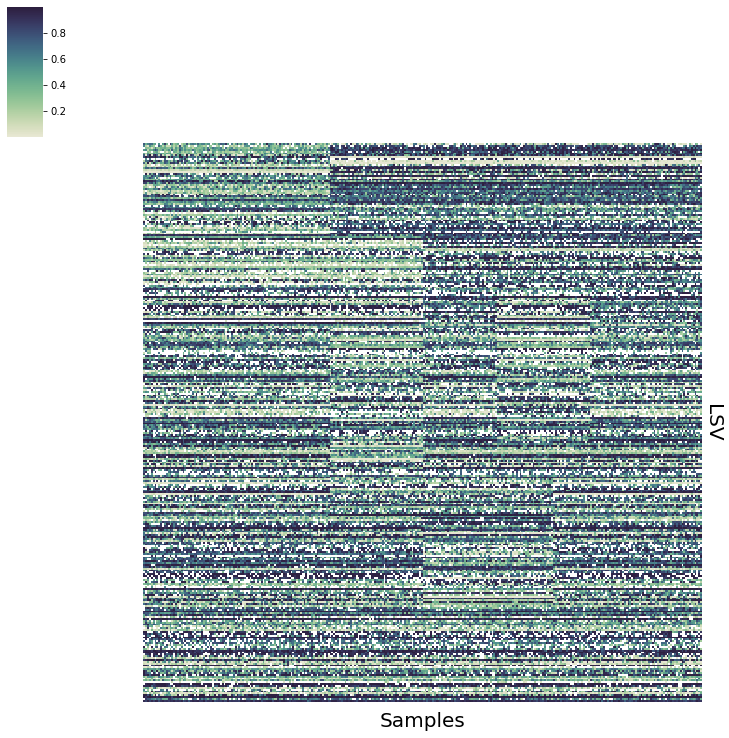

In [5]:
vis.Heatmap(sim_data.psi,savefig="plots/sim_data.png")

### Estimating Missingness Priors

This step requires training data from control (i.e non cancer tissue) tissues to fit a beta-binomial regression to empirically estimate priors. We provide training data for whole blood. If your tissue of interest is different, please generate a file where the first column is the missingness rate, second column is median read depth and each row is an LSV (or any unit of splicing measurement of your choice). 

In [6]:
priors.EstimateMissingPriors(sim_data,"data/gtex_missingness.csv")

### Running CHESSBOARD Algorithm

To run the CHESSBOARD algorithm, save the current object and then running the command line tool. The tool can be run using

```
python chessboard.py data/sim_data.cb data/sim_data/ -I 100 -B 50 -V
```

For testing, we recommend running for a few hundred iterations in verbose mode. See the CHESSBOARD documentation or additional flags. 

After running the algorithm, add the output back to the object.

In [7]:
sim_data.writeChessboardInput("data/sim_data")

In [8]:
sim_data.addChessboardOutput("data/sim_data_out.cb")

### Posterior Summary

Summarize the posterior samples into a point estimate for plotting and downstream analysis. We recommend using a posterior marginal cutoff of 0.7 confidence.

In [9]:
postsum.generatePointEstimate(sim_data,0.7)

### Visualization

To visualize the result, we provide 2 methods:
1. GAMBIT: Simply write the object to GABMIT format and upload to our online interactive interface at: [URL HERE]
2. Python: the the function shown below and save plots.

In [10]:
sim_data.writeGambitFile("data/sim_data")

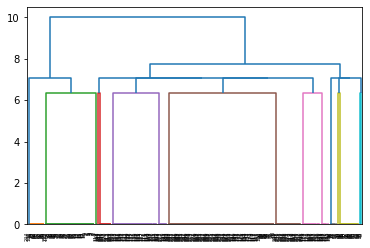

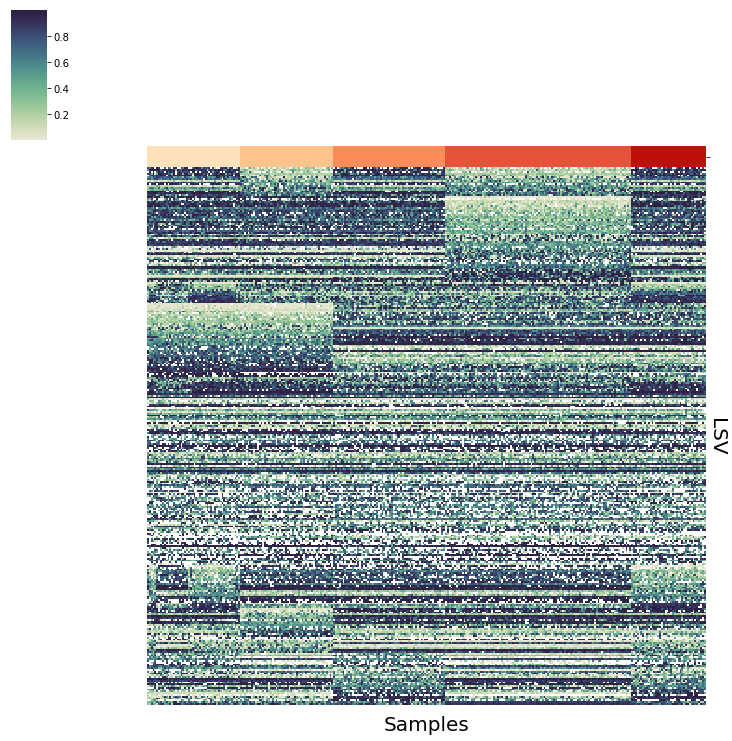

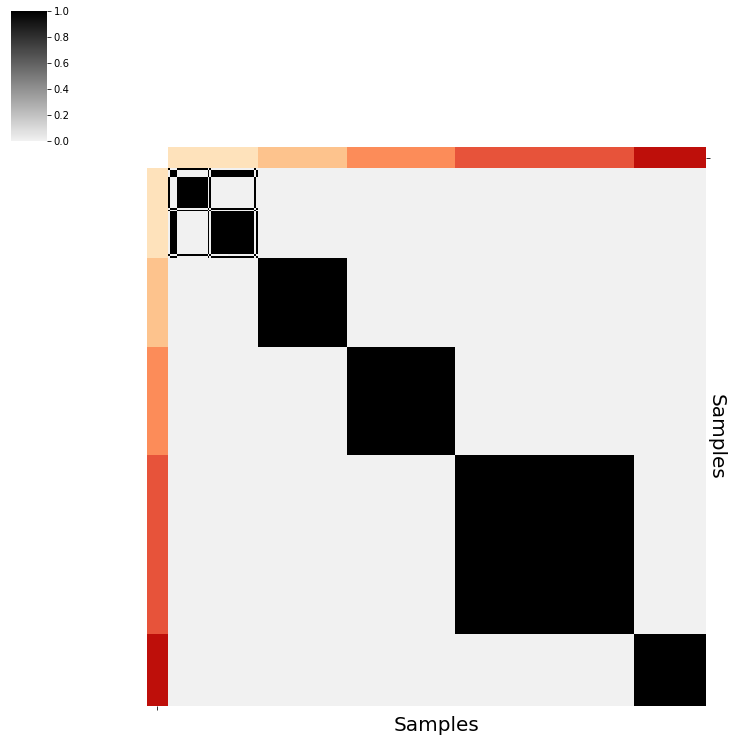

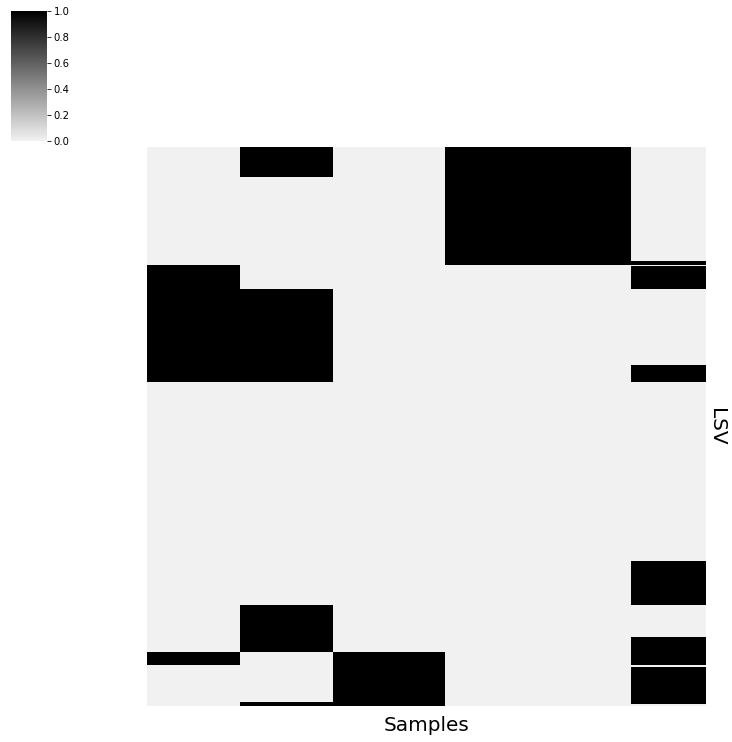

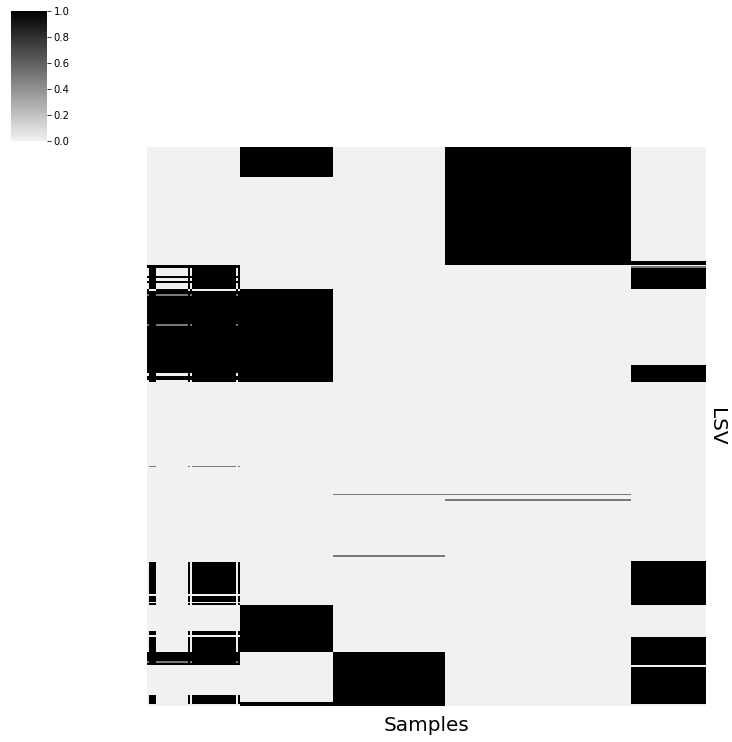

In [11]:
vis.PlotPointEstimate(sim_data,save="plots/sim_data")